In [1]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from math import pi

In [58]:
def initialize(circuit, measurement_qbits, target_qbit):
    for qbit in range(measurement_qbits):
        circuit.h(qbit)
        
    circuit.x(target_qbit)

In [59]:
def controlled_unitary_gate(circuit, measurement_qbits, target_qbit, theta):
    exponent = 1
    for control_qbit in range(measurement_qbits): 
        for rotation in range(exponent):
            circuit.cu1(2*pi*theta, control_qbit, target_qbit)
        exponent *= 2

    circuit.barrier()

In [64]:
def inverse_qft(circuit, measurement_qbits, target_qubit, theta):
    for qbit in range(measurement_qbits//2):
        circuit.swap(qbit, n-qbit-1)
    
    circuit.barrier()
        
    for control_qbit in range(measurement_qbits):
        for next_qbit in range(control_qbit):
            circuit.cu1(-pi/(2**(control_qbit - next_qbit)), next_qbit, control_qbit)
        circuit.h(control_qbit)

In [71]:
def main(n, theta):
    qc = QuantumCircuit(n+1, n)    # +1 for the single target state |Ψ>
    
#   n = measurement_qbits, 1 target_qbit
    measurement_qbits = n
    initialize(qc, measurement_qbits, n)
    
    controlled_unitary_gate(qc, measurement_qbits, n, theta)
    
    inverse_qft(qc, measurement_qbits, n, theta)
    qc.barrier()
    qc.measure(range(n), range(n))
    
    return qc

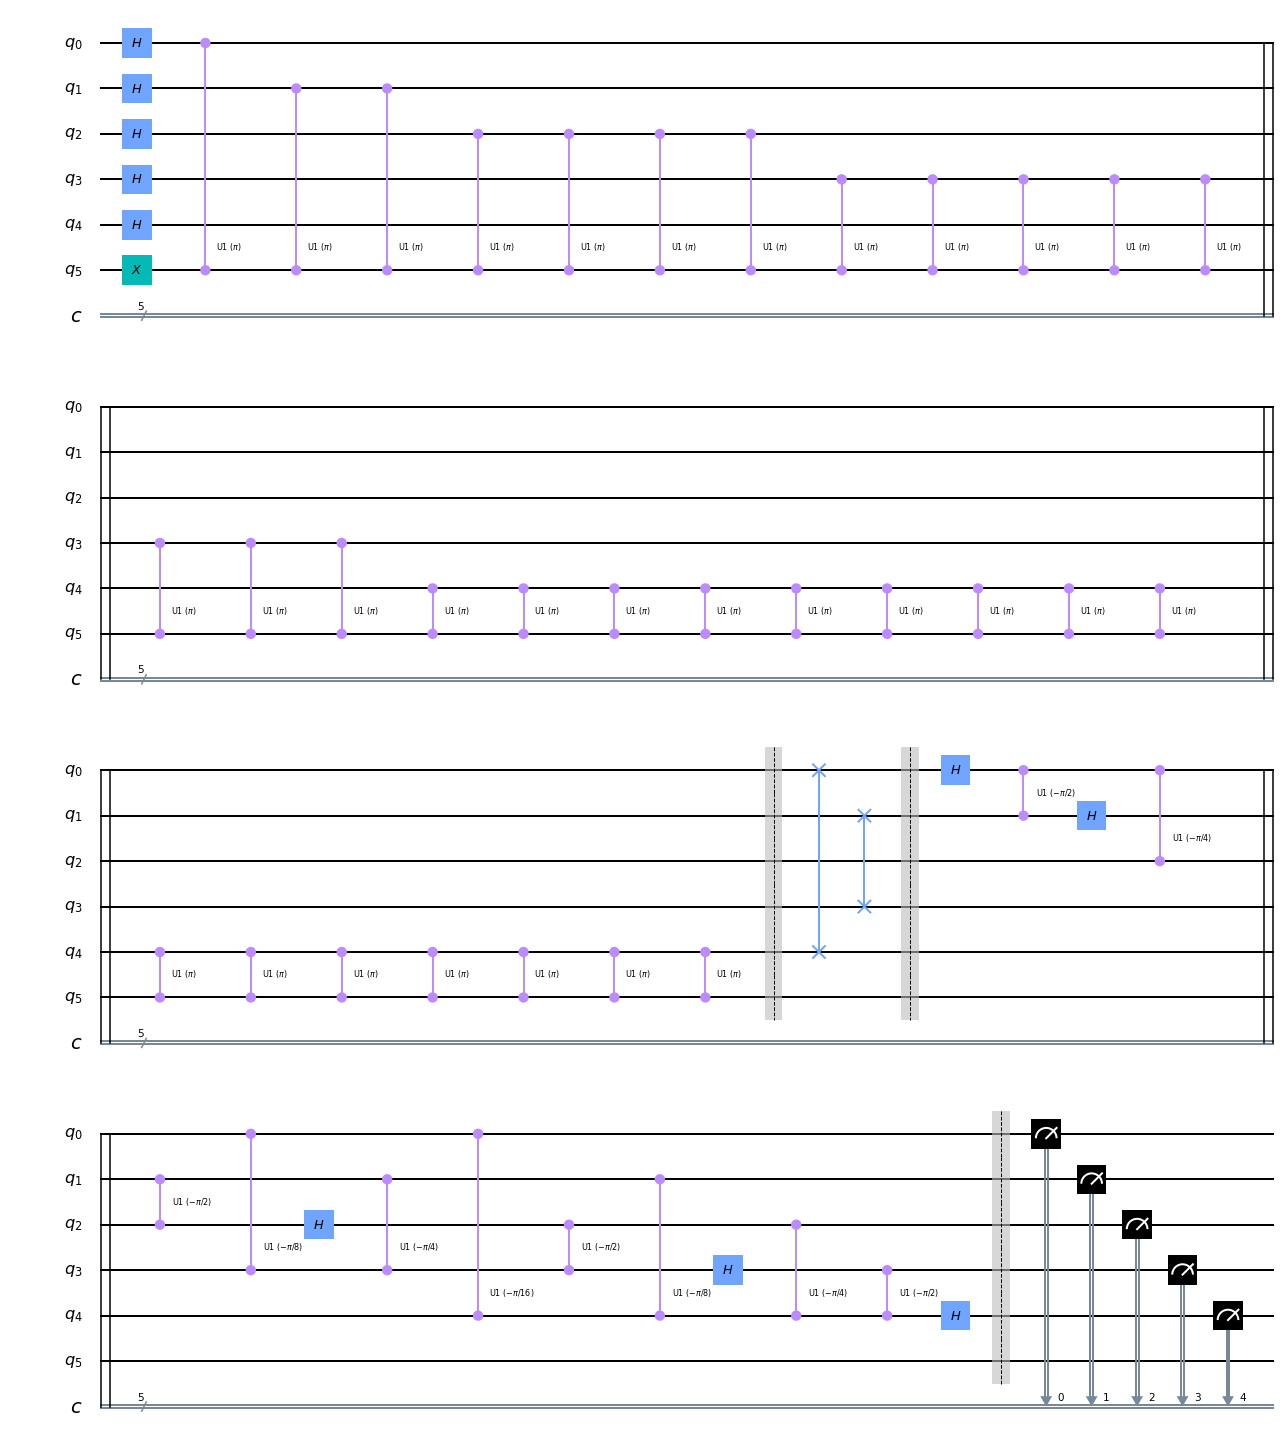

In [72]:
if __name__ == '__main__':
    n = 5
    theta = 0.5
    circuit = main(n, theta)
    display(circuit.draw('mpl'))
    
# Chck the qubits and their ordering. 
# Should q0 have 16 controlled-U gates or q4 should?